## Titanic Disaster Dataset - data.world

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [39]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [40]:
df.shape

(1309, 14)

In [42]:
cols = {}
for col in df.columns:
    cols[col] = col.title()
df = df.rename(columns=cols)

In [43]:
df['embarked'] = df.Embarked.fillna('S')
df['Age'] = df.Age.fillna(df.Age.median())

In [44]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_binned'] = pd.cut(df.Age, bins, right=True, include_lowest=False)
# child variable
df['Child'] = (df.Age < 16).astype(int)
surv = df[df.Survived == 1]

Text(0, 0.5, '')

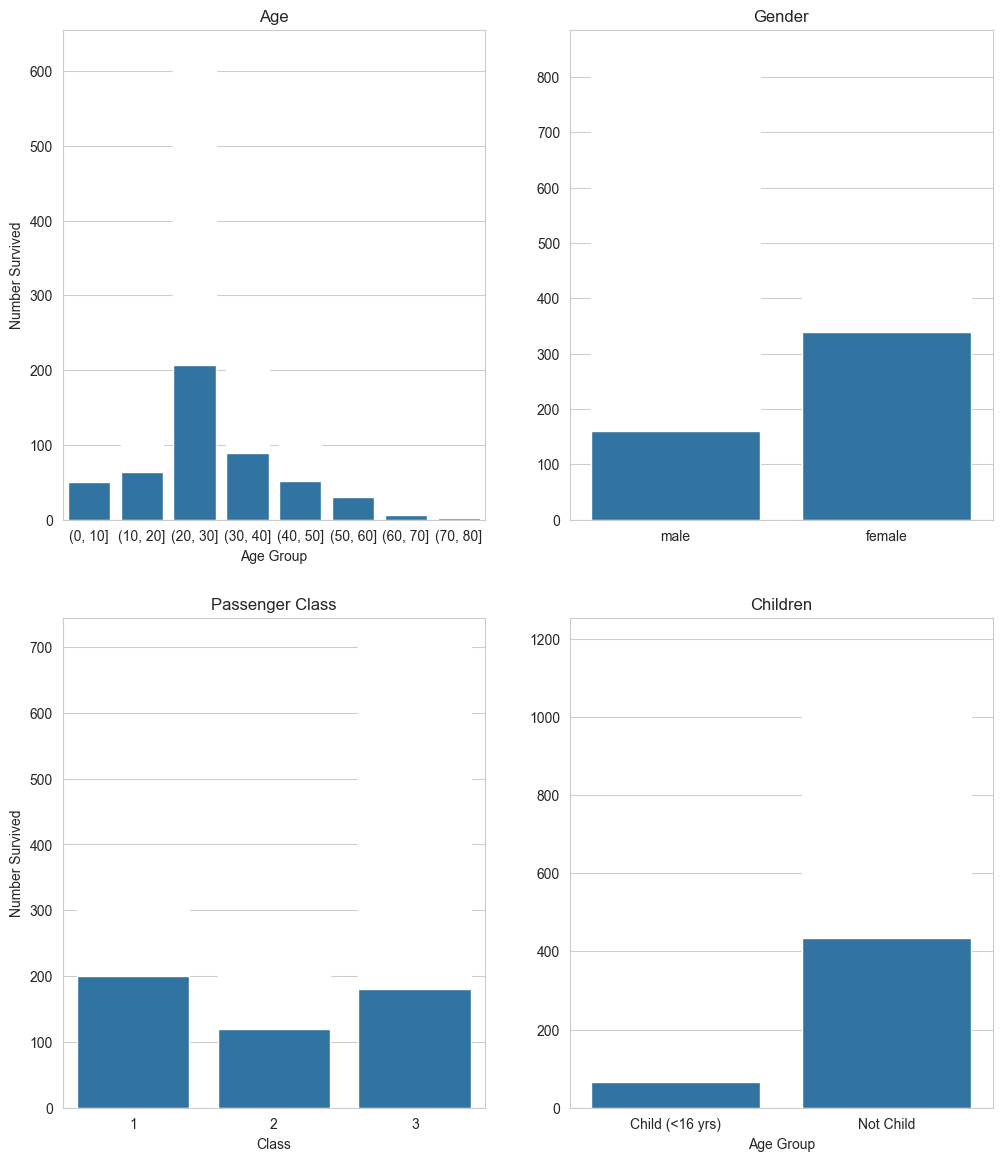

In [45]:
fig, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(12,14))

sns.set_style('dark')
order = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]',
         '(60, 70]', '(70, 80]']

sns.countplot(x='age_binned', color='white', ax=ax1, data=df, order=order)
sns.countplot(x='age_binned', ax=ax1, data=surv, order=order)
plt.xlabel('Age Group')
plt.ylabel('Total / Survived')
ax1.set_title('Age')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number Survived')


sns.set_style('dark')
sns.countplot(x='Sex', color='white', ax=ax2, data=df, order=['male','female'])
sns.countplot(x='Sex', ax=ax2, data=surv,  order=['male','female'])
plt.ylabel('Survived')
ax2.set_xlabel('')
ax2.set_title('Gender')
ax2.set_ylabel('')

sns.countplot(x='Pclass', color='white', ax=ax3, data=df,  order=[1, 2, 3])
sns.countplot(x='Pclass', ax=ax3, data=surv,  order=[1, 2, 3])
ax3.set_title('Passenger Class')
ax3.set_ylabel('Number Survived')
ax3.set_xlabel('Class')


sns.countplot(x='Child', color='white', ax=ax4, data=df, order=[1,0])
sns.countplot(x='Child', ax=ax4, data=surv, order=[1,0])
loc, labels = plt.xticks()
plt.xticks(loc,['Child (<16 yrs)','Not Child'])
plt.ylabel('Survived')
ax4.set_title('Children')
ax4.set_ylabel('')

Text(0.5, 0, '')

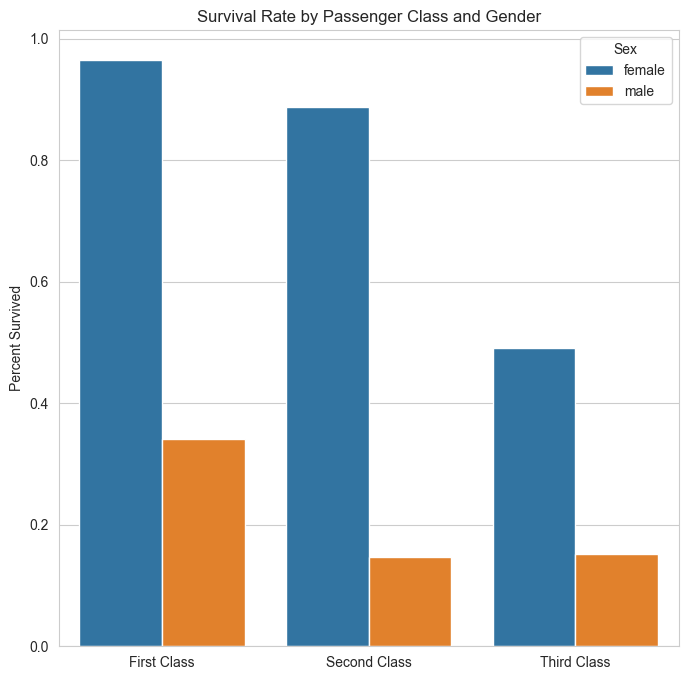

In [46]:
sns.set_style('whitegrid')
fig, axis = plt.subplots(figsize=(8,8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, ax=axis, errorbar=None)
axis.set_title('Survival Rate by Passenger Class and Gender')
loc, labels = plt.xticks()
plt.xticks(loc, ['First Class','Second Class', 'Third Class'])
axis.set_ylabel('Percent Survived')
axis.set_xlabel('')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      1309 non-null   int64   
 1   Survived    1309 non-null   int64   
 2   Name        1309 non-null   object  
 3   Sex         1309 non-null   object  
 4   Age         1309 non-null   float64 
 5   Sibsp       1309 non-null   int64   
 6   Parch       1309 non-null   int64   
 7   Ticket      1309 non-null   object  
 8   Fare        1308 non-null   float64 
 9   Cabin       295 non-null    object  
 10  Embarked    1307 non-null   object  
 11  Boat        486 non-null    object  
 12  Body        121 non-null    float64 
 13  Home.Dest   745 non-null    object  
 14  embarked    1309 non-null   object  
 15  age_binned  1309 non-null   category
 16  Child       1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 165.5+ KB


In [48]:
df.head()

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.Dest,embarked,age_binned,Child
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",S,"(20, 30]",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",S,"(0, 10]",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",S,"(0, 10]",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",S,"(20, 30]",0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",S,"(20, 30]",0


## Applying Semi-Strutucre Model

#### Features
---
- survival - Sobrevivência (0 = Não; 1 = Sim)
- class - Classe de passageiros (1 = 1º; 2 = 2º; 3 = 3º)
- name - Nome
- sexo - Sexo
- age - Idade
- sibsp - Número de irmãos/cônjuges a bordo
- parch - Número de pais/filhos a bordo
- ticket - Número do bilhete
- fare - Tarifa do passageiro
- cabin - Cabine
- embarked - Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Bote salva-vidas (se sobreviveu)
- body - Número do corpo (se não sobreviveu e o corpo foi recuperado)

Traduzido com a versão gratuita do tradutor - DeepL.com

### Prepare data to model

In [49]:
df.drop(columns=['age_binned', 'Child'], inplace=True)

In [50]:
for col in df.columns:
    print(f'Values in {col}')
    print(df[col].value_counts(dropna=False))
    print('-'*50)

Values in Pclass
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
--------------------------------------------------
Values in Survived
Survived
0    809
1    500
Name: count, dtype: int64
--------------------------------------------------
Values in Name
Name
Connolly, Miss. Kate                               2
Kelly, Mr. James                                   2
Baumann, Mr. John D                                1
Baxter, Mr. Quigg Edmond                           1
Baxter, Mrs. James (Helene DeLaudeniere Chaput)    1
                                                  ..
Vander Cruyssen, Mr. Victor                        1
Vander Planke, Miss. Augusta Maria                 1
Vander Planke, Mr. Julius                          1
Vander Planke, Mr. Leo Edmondus                    1
Aubart, Mme. Leontine Pauline                      1
Name: count, Length: 1307, dtype: int64
--------------------------------------------------
Values in Sex
Sex
male      843
female    466
Name: cou

In [51]:
df.isna().sum()

Pclass          0
Survived        0
Name            0
Sex             0
Age             0
Sibsp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2
Boat          823
Body         1188
Home.Dest     564
embarked        0
dtype: int64

In [52]:
df.dropna(subset=['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp'], inplace=True)

In [53]:
df.Fare = df.Fare.fillna(df.Fare.median())

In [54]:
df.Cabin = df.Cabin.fillna('Unknown')

In [55]:
df['Home.Dest'].value_counts(dropna=False)

Home.Dest
NaN                               564
New York, NY                       64
London                             14
Montreal, PQ                       10
Paris, France                       9
                                 ... 
Waukegan, Chicago, IL               1
Myren, Sweden New York, NY          1
Finland Sudbury, ON                 1
Oslo, Norway Cameron, WI            1
Antwerp, Belgium / Stanton, OH      1
Name: count, Length: 370, dtype: int64

In [56]:
df['Home.Dest'] = df['Home.Dest'].fillna('Unknown')

In [57]:
df.Embarked.value_counts(dropna=False)

Embarked
S      914
C      270
Q      123
NaN      2
Name: count, dtype: int64

In [58]:
df[df.Embarked.isna()]

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.Dest,embarked
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,Unknown,S
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH",S


In [59]:
df[df.Cabin.str.startswith('B')]['Embarked'].value_counts(dropna=False)

Embarked
C      32
S      31
NaN     2
Name: count, dtype: int64

In [60]:
df[df.Cabin.str.startswith('B')]

,Pclass,Survived,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home.Dest,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",S
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",C
16,1,0,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,NaN,NaN,"Montreal, PQ",C
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ",C
26,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI",C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,1,0,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,B78,C,NaN,NaN,"Paris, France",C
277,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,B78,C,6,NaN,"Paris, France",C
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",C
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,6,NaN,"Cincinatti, OH",S


In [61]:
df.Embarked = df.embarked

df.drop(columns=['embarked'], inplace=True)

In [62]:
#Delete columns that are not needed
df.drop(columns=['Body', 'Boat','Name'], inplace=True)

In [63]:
df

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542,Unknown,C,Unknown
1305,3,0,female,28.0000,1,0,2665,14.4542,Unknown,C,Unknown
1306,3,0,male,26.5000,0,0,2656,7.2250,Unknown,C,Unknown
1307,3,0,male,27.0000,0,0,2670,7.2250,Unknown,C,Unknown


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Survived   1309 non-null   int64  
 2   Sex        1309 non-null   object 
 3   Age        1309 non-null   float64
 4   Sibsp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Ticket     1309 non-null   object 
 7   Fare       1309 non-null   float64
 8   Cabin      1309 non-null   object 
 9   Embarked   1309 non-null   object 
 10  Home.Dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


### Separating data

In [65]:
test_titanic_df = df.sample(frac=0.3, random_state=42)
work_titanic_df = df.drop(test_titanic_df.index)

In [66]:
test_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393 entries, 1148 to 513
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     393 non-null    int64  
 1   Survived   393 non-null    int64  
 2   Sex        393 non-null    object 
 3   Age        393 non-null    float64
 4   Sibsp      393 non-null    int64  
 5   Parch      393 non-null    int64  
 6   Ticket     393 non-null    object 
 7   Fare       393 non-null    float64
 8   Cabin      393 non-null    object 
 9   Embarked   393 non-null    object 
 10  Home.Dest  393 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.8+ KB


In [67]:
test_titanic_df

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
1148,3,0,male,35.0,0,0,STON/O 2. 3101273,7.1250,Unknown,S,Unknown
1049,3,1,male,20.0,1,1,2653,15.7417,Unknown,C,Unknown
982,3,0,male,28.0,0,0,349235,7.8958,Unknown,S,Unknown
808,3,0,male,28.0,0,0,A/5 1478,8.0500,Unknown,S,"Bridgwater, Somerset, England"
1195,3,0,male,28.0,0,0,370374,7.7500,Unknown,Q,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
325,2,0,male,30.0,0,0,248744,13.0000,Unknown,S,"Bryn Mawr, PA, USA"
919,3,0,male,18.5,0,0,2682,7.2292,Unknown,C,Unknown
532,2,0,male,41.0,0,0,237393,13.0000,Unknown,S,Unknown
1159,3,1,female,28.0,0,0,342712,8.0500,Unknown,S,Unknown


In [68]:
work_titanic_df.Survived.value_counts(dropna=False)

Survived
0    585
1    331
Name: count, dtype: int64

In [69]:
work_titanic_df_not_labeled = work_titanic_df[work_titanic_df['Survived'].isna()]
work_titanic_df_labeled = work_titanic_df.drop(work_titanic_df_not_labeled.index)


work_titanic_df_not_labeled

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest


In [70]:
work_titanic_df = pd.concat([work_titanic_df_labeled, work_titanic_df_not_labeled], ignore_index=True)
work_titanic_df

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
911,3,0,female,14.5000,1,0,2665,14.4542,Unknown,C,Unknown
912,3,0,female,28.0000,1,0,2665,14.4542,Unknown,C,Unknown
913,3,0,male,26.5000,0,0,2656,7.2250,Unknown,C,Unknown
914,3,0,male,27.0000,0,0,2670,7.2250,Unknown,C,Unknown


### Data prepared for semi-supervised models application

In [71]:
work_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     916 non-null    int64  
 1   Survived   916 non-null    int64  
 2   Sex        916 non-null    object 
 3   Age        916 non-null    float64
 4   Sibsp      916 non-null    int64  
 5   Parch      916 non-null    int64  
 6   Ticket     916 non-null    object 
 7   Fare       916 non-null    float64
 8   Cabin      916 non-null    object 
 9   Embarked   916 non-null    object 
 10  Home.Dest  916 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 78.8+ KB


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

work_titanic_df_encoded = work_titanic_df.copy()

work_titanic_df_encoded


,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
911,3,0,female,14.5000,1,0,2665,14.4542,Unknown,C,Unknown
912,3,0,female,28.0000,1,0,2665,14.4542,Unknown,C,Unknown
913,3,0,male,26.5000,0,0,2656,7.2250,Unknown,C,Unknown
914,3,0,male,27.0000,0,0,2670,7.2250,Unknown,C,Unknown


In [73]:
for col in work_titanic_df_encoded.columns:
    work_titanic_df_encoded[col] = le.fit_transform(work_titanic_df_encoded[col])

work_titanic_df_encoded

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,0,1,0,41,0,0,143,236,32,2,233
1,0,1,1,4,1,2,37,234,61,2,174
2,0,0,0,6,1,2,37,234,61,2,174
3,0,0,1,42,1,2,37,234,61,2,174
4,0,0,0,35,1,2,37,234,61,2,174
...,...,...,...,...,...,...,...,...,...,...,...
911,2,0,0,20,1,0,198,90,146,0,261
912,2,0,0,39,1,0,198,90,146,0,261
913,2,0,1,37,0,0,190,15,146,0,261
914,2,0,1,38,0,0,202,15,146,0,261


In [74]:
work_titanic_df_encoded['Survived'].value_counts(dropna=False)

Survived
0    585
1    331
Name: count, dtype: int64

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
work_titanic_df_norm = pd.DataFrame(scaler.fit_transform(work_titanic_df_encoded), columns = work_titanic_df_encoded.columns)

work_titanic_df_norm

,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,0.0,1.0,0.0,0.465909,0.000000,0.000000,0.206349,0.971193,0.219178,1.0,0.820423
1,0.0,1.0,1.0,0.045455,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
2,0.0,0.0,0.0,0.068182,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
3,0.0,0.0,1.0,0.477273,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
4,0.0,0.0,0.0,0.397727,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
...,...,...,...,...,...,...,...,...,...,...,...
911,1.0,0.0,0.0,0.227273,0.166667,0.000000,0.285714,0.370370,1.000000,0.0,0.919014
912,1.0,0.0,0.0,0.443182,0.166667,0.000000,0.285714,0.370370,1.000000,0.0,0.919014
913,1.0,0.0,1.0,0.420455,0.000000,0.000000,0.274170,0.061728,1.000000,0.0,0.919014
914,1.0,0.0,1.0,0.431818,0.000000,0.000000,0.291486,0.061728,1.000000,0.0,0.919014


In [76]:
work_titanic_df_norm['Survived'].value_counts(dropna=False)

Survived
0.0    585
1.0    331
Name: count, dtype: int64

In [77]:
to_not_labeled = work_titanic_df_norm.sample(frac=0.7)
to_labeled = work_titanic_df_norm.drop(to_not_labeled.index)

to_not_labeled['Survived'] = np.nan

work_titanic_df_norm_labeled = to_labeled.copy()

work_titanic_df_norm_not_labeled = to_not_labeled.copy()

In [78]:
work_titanic_df_norm_labeled['Survived'].value_counts(dropna=False)

Survived
0.0    168
1.0    107
Name: count, dtype: int64

### Applying SVM

#### Labeled

In [79]:
work_titanic_df_norm_labeled.isnull().sum()

Pclass       0
Survived     0
Sex          0
Age          0
Sibsp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
Home.Dest    0
dtype: int64

In [80]:
work_titanic_df_norm_labeled.shape

(275, 11)

In [81]:
X = work_titanic_df_norm_labeled.drop('Survived', axis=1)
y = work_titanic_df_norm_labeled['Survived']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, stratify = y, random_state = 10)

svm = SVC(kernel = 'linear', random_state = 10)

svm.fit(X_treino, y_treino)

y_previsto = svm.predict(X_teste)

resultados_svm = classification_report(y_teste, y_previsto)

print(resultados_svm)

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78        42
         1.0       0.68      0.48      0.57        27

    accuracy                           0.71        69
   macro avg       0.70      0.67      0.67        69
weighted avg       0.71      0.71      0.70        69



In [83]:
print(f'X = {X.shape[0]} - X_treino = {X_treino.shape[0]}')

X = 275 - X_treino = 206


#### Not Labeled

In [84]:
work_titanic_df_norm_not_labeled = work_titanic_df_norm_not_labeled.drop('Survived', axis=1)

In [85]:
work_titanic_df_norm_not_labeled

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
894,1.0,1.0,0.329545,0.000000,0.0,0.277056,0.061728,1.000000,0.0,0.919014
212,0.0,1.0,0.920455,0.000000,0.0,0.008658,0.662551,0.123288,1.0,0.126761
25,0.0,0.0,0.295455,0.166667,0.0,0.090909,0.913580,0.212329,0.0,0.264085
10,0.0,0.0,0.272727,0.166667,0.0,0.904762,0.983539,0.493151,0.0,0.630282
589,1.0,1.0,0.443182,0.166667,0.0,0.747475,0.473251,1.000000,1.0,0.919014
...,...,...,...,...,...,...,...,...,...,...
391,0.5,0.0,0.772727,0.000000,0.0,0.849928,0.279835,1.000000,1.0,0.454225
909,1.0,1.0,0.443182,0.000000,0.0,0.264069,0.061728,1.000000,0.0,0.919014
193,0.0,0.0,0.636364,0.166667,0.0,0.103896,0.769547,0.876712,1.0,0.267606
121,0.0,1.0,0.681818,0.166667,0.0,0.057720,0.748971,1.000000,1.0,0.630282


In [86]:
y_pred_not_labeled = svm.predict(work_titanic_df_norm_not_labeled)

In [87]:
y_pred_not_labeled

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1.

In [88]:
y_pred_not_labeled.shape

(641,)

In [89]:
X_treino

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
179,0.0,0.0,0.534091,0.000000,0.000000,0.900433,0.584362,0.000000,0.0,0.683099
910,1.0,1.0,0.443182,0.000000,0.000000,0.256854,0.374486,1.000000,0.0,0.919014
434,1.0,1.0,0.102273,0.666667,0.285714,0.496392,0.641975,1.000000,1.0,0.845070
93,0.0,0.0,0.329545,0.000000,0.285714,0.109668,0.724280,0.178082,0.0,1.000000
1,0.0,1.0,0.045455,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
...,...,...,...,...,...,...,...,...,...,...
283,0.5,1.0,0.545455,0.166667,0.000000,0.343434,0.493827,1.000000,1.0,0.211268
629,1.0,0.0,0.431818,0.000000,0.285714,0.520924,0.283951,1.000000,1.0,0.919014
359,0.5,1.0,0.306818,0.000000,0.000000,0.939394,0.349794,0.712329,0.0,0.190141
824,1.0,0.0,0.443182,0.166667,1.000000,0.842713,0.823045,1.000000,1.0,0.919014


#### Psedo Labeling

In [90]:
new_x_train = pd.concat([X, work_titanic_df_norm_not_labeled], ignore_index = True)
new_x_train

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
0,0.0,1.0,0.045455,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
1,0.0,0.0,0.068182,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
2,0.0,1.0,0.750000,0.000000,0.000000,0.144300,0.576132,0.808219,1.0,0.630282
3,0.0,0.0,0.375000,0.000000,0.000000,0.862915,0.818930,0.164384,0.0,0.683099
4,0.0,0.0,0.409091,0.000000,0.000000,0.137085,0.868313,1.000000,1.0,0.919014
...,...,...,...,...,...,...,...,...,...,...
911,0.5,0.0,0.772727,0.000000,0.000000,0.849928,0.279835,1.000000,1.0,0.454225
912,1.0,1.0,0.443182,0.000000,0.000000,0.264069,0.061728,1.000000,0.0,0.919014
913,0.0,0.0,0.636364,0.166667,0.000000,0.103896,0.769547,0.876712,1.0,0.267606
914,0.0,1.0,0.681818,0.166667,0.000000,0.057720,0.748971,1.000000,1.0,0.630282


In [91]:
new_y_train = pd.concat([pd.Series(y), pd.Series(y_pred_not_labeled)], ignore_index = True)
new_y_train

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
911    1.0
912    0.0
913    1.0
914    0.0
915    0.0
Length: 916, dtype: float64

In [92]:
X_treino, X_teste, y_treino, y_teste = train_test_split(new_x_train, new_y_train, stratify = new_y_train, random_state = 10)

In [93]:
pseudo_labeling_model = SVC(kernel = 'linear', random_state = 10)
pseudo_labeling_model.fit(new_x_train, new_y_train)
new_y_pred = pseudo_labeling_model.predict(X_teste)
resultados_pseudo_labeling = classification_report(y_teste, new_y_pred)

print(resultados_svm)
print('-'*100)
print(resultados_pseudo_labeling)

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78        42
         1.0       0.68      0.48      0.57        27

    accuracy                           0.71        69
   macro avg       0.70      0.67      0.67        69
weighted avg       0.71      0.71      0.70        69

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       145
         1.0       0.96      0.89      0.93        84

    accuracy                           0.95       229
   macro avg       0.95      0.94      0.94       229
weighted avg       0.95      0.95      0.95       229



#### Self training

In [94]:
X_treino, X_teste, y_treino, y_teste = train_test_split(new_x_train, new_y_train, stratify = new_y_train, random_state = 10)

svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(X_treino, y_treino)

prob_y = svm.predict_proba(work_titanic_df_norm_not_labeled)

self_y_pred = svm.predict(work_titanic_df_norm_not_labeled)

In [95]:
prob_y.shape


(641, 2)

In [96]:
prob_tbl_result = pd.DataFrame(prob_y, columns = ['Prob C0', 'Prob C1'])
prob_tbl_result['Predict'] = self_y_pred
prob_tbl_result['Max Prob'] = prob_tbl_result[['Prob C0', 'Prob C1']].max(axis = 1)

prob_tbl_result

,Prob C0,Prob C1,Predict,Max Prob
0,0.934627,0.065373,0.0,0.934627
1,0.934637,0.065363,0.0,0.934637
2,0.096670,0.903330,1.0,0.903330
3,0.096618,0.903382,1.0,0.903382
4,0.934593,0.065407,0.0,0.934593
...,...,...,...,...
636,0.096679,0.903321,1.0,0.903321
637,0.934629,0.065371,0.0,0.934629
638,0.096710,0.903290,1.0,0.903290
639,0.934646,0.065354,0.0,0.934646


<Axes: ylabel='Frequency'>

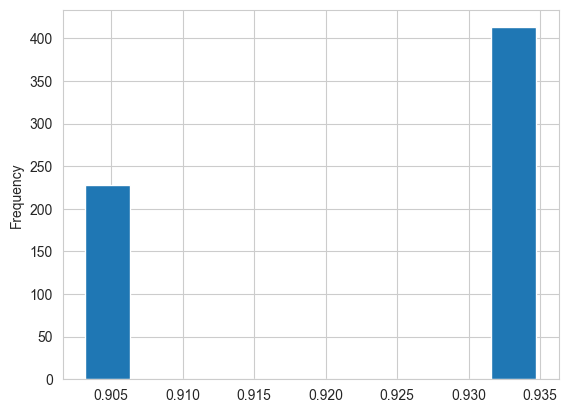

In [97]:
prob_tbl_result['Max Prob'].plot(kind = 'hist')

In [98]:
confidence_filter = prob_tbl_result['Max Prob'] > 0.939
confidence_filter

0      False
1      False
2      False
3      False
4      False
       ...  
636    False
637    False
638    False
639    False
640    False
Name: Max Prob, Length: 641, dtype: bool

In [99]:
work_titanic_df_norm_not_labeled.reset_index(drop=True, inplace=True)

In [100]:
work_filtered_confidence = work_titanic_df_norm_not_labeled[confidence_filter]

In [101]:
prob_tbl_result.loc[confidence_filter, 'Predict'].shape[0] + y.shape[0]

275

In [102]:
X.shape[0] + work_filtered_confidence.shape[0]

275

In [103]:
novo_x_treino = pd.concat([X, work_titanic_df_norm_not_labeled[confidence_filter]])
novo_y_treino = pd.concat([pd.Series(y), prob_tbl_result.loc[confidence_filter, 'Predict']])

In [104]:
novo_x_treino

,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked,Home.Dest
1,0.0,1.0,0.045455,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
2,0.0,0.0,0.068182,0.166667,0.285714,0.053391,0.962963,0.417808,1.0,0.612676
5,0.0,1.0,0.750000,0.000000,0.000000,0.144300,0.576132,0.808219,1.0,0.630282
11,0.0,0.0,0.375000,0.000000,0.000000,0.862915,0.818930,0.164384,0.0,0.683099
12,0.0,0.0,0.409091,0.000000,0.000000,0.137085,0.868313,1.000000,1.0,0.919014
...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.159091,0.000000,0.285714,0.467532,0.530864,1.000000,1.0,0.919014
895,1.0,1.0,0.306818,0.000000,0.000000,0.619048,0.148148,1.000000,1.0,0.919014
908,1.0,0.0,0.238636,0.166667,0.000000,0.278499,0.370370,1.000000,0.0,0.919014
910,1.0,1.0,0.443182,0.000000,0.000000,0.256854,0.374486,1.000000,0.0,0.919014


In [105]:
novo_y_treino

1      1.0
2      0.0
5      1.0
11     1.0
12     1.0
      ... 
886    0.0
895    0.0
908    1.0
910    0.0
915    0.0
Length: 275, dtype: float64

In [106]:
svm = SVC(kernel = 'linear', probability = True, random_state = 10)
svm.fit(novo_x_treino, novo_y_treino)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [107]:
novo_y_previsto = svm.predict(X_teste)
resultados_self_training = classification_report(y_teste, novo_y_previsto)

print(resultados_svm)
print('-'*100)
print(resultados_pseudo_labeling)
print('-'*100)
print(resultados_self_training)

              precision    recall  f1-score   support

         0.0       0.72      0.86      0.78        42
         1.0       0.68      0.48      0.57        27

    accuracy                           0.71        69
   macro avg       0.70      0.67      0.67        69
weighted avg       0.71      0.71      0.70        69

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       145
         1.0       0.96      0.89      0.93        84

    accuracy                           0.95       229
   macro avg       0.95      0.94      0.94       229
weighted avg       0.95      0.95      0.95       229

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       145
         1.0       0.96      0.89  

Matriz de Confusão:
[[142   3]
 [  9  75]]


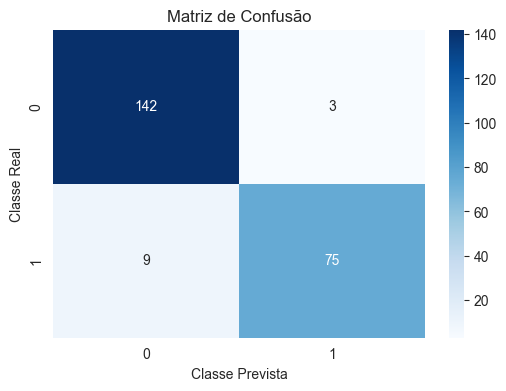

In [108]:
from sklearn.metrics import confusion_matrix
# Gerar a matriz de confusão
cm = confusion_matrix(y_teste, novo_y_previsto)

# Exibir a matriz de confusão como DataFrame para uma visualização mais clara
print("Matriz de Confusão:")
print(cm)

# Plotar a matriz de confusão usando seaborn para melhor visualização
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.show()

In [109]:
y_teste.value_counts()

0.0    145
1.0     84
Name: count, dtype: int64